   day  marketing_spend  weekday  website_visits
0    1             4174        1            2649
1    2             4507        2            2822
2    3             1860        3            1625
3    4             2294        4            1805
4    5             2130        5            1702


c:\Users\rajva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Website Visits: 2549


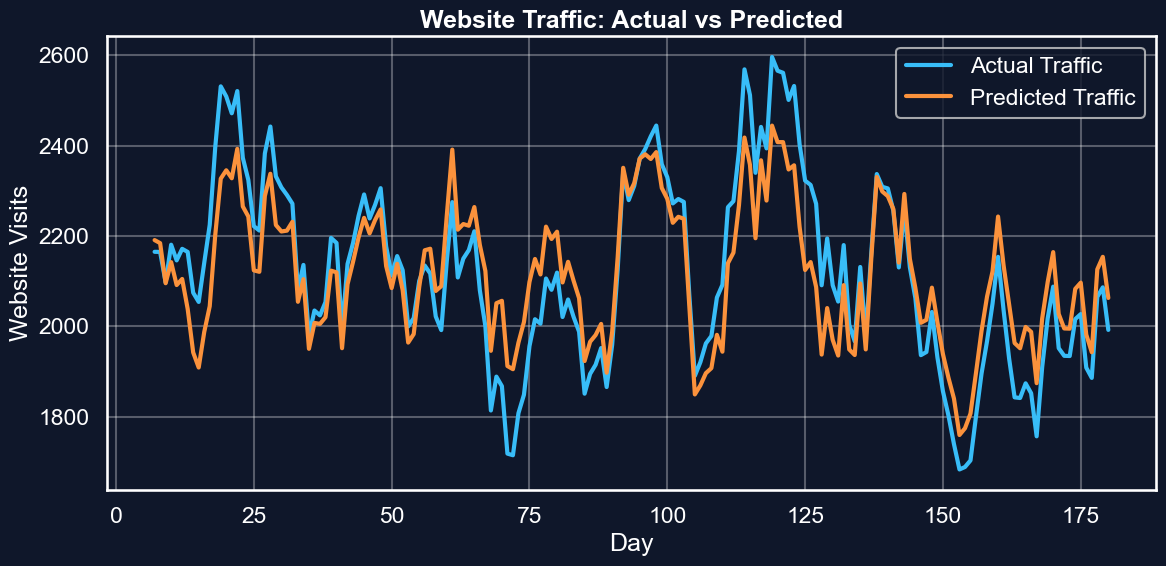

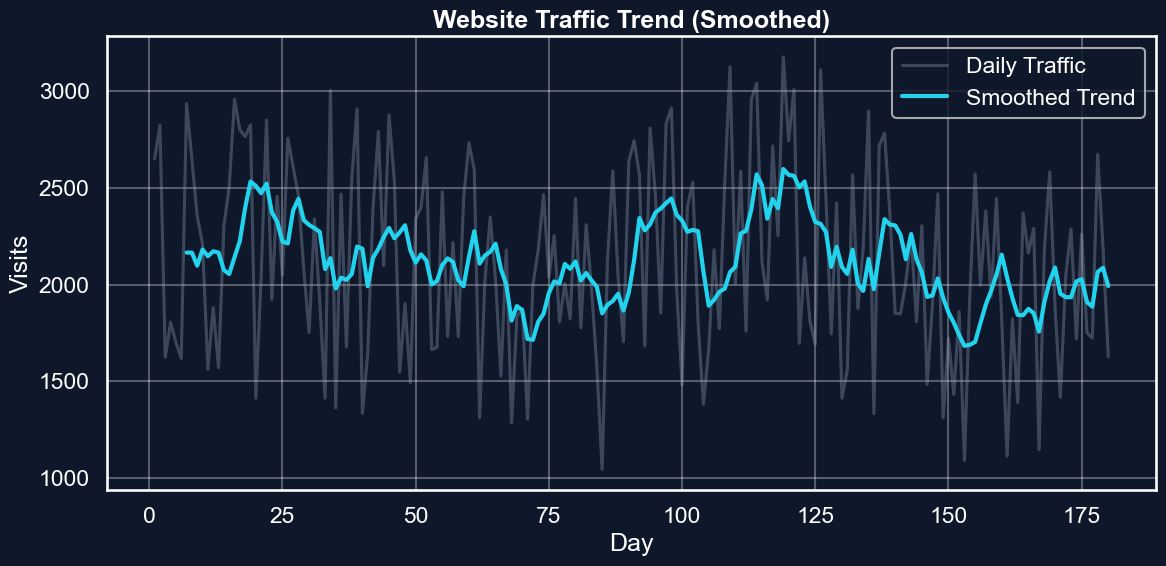

C:\Users\rajva\AppData\Local\Temp\ipykernel_7392\1921665110.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


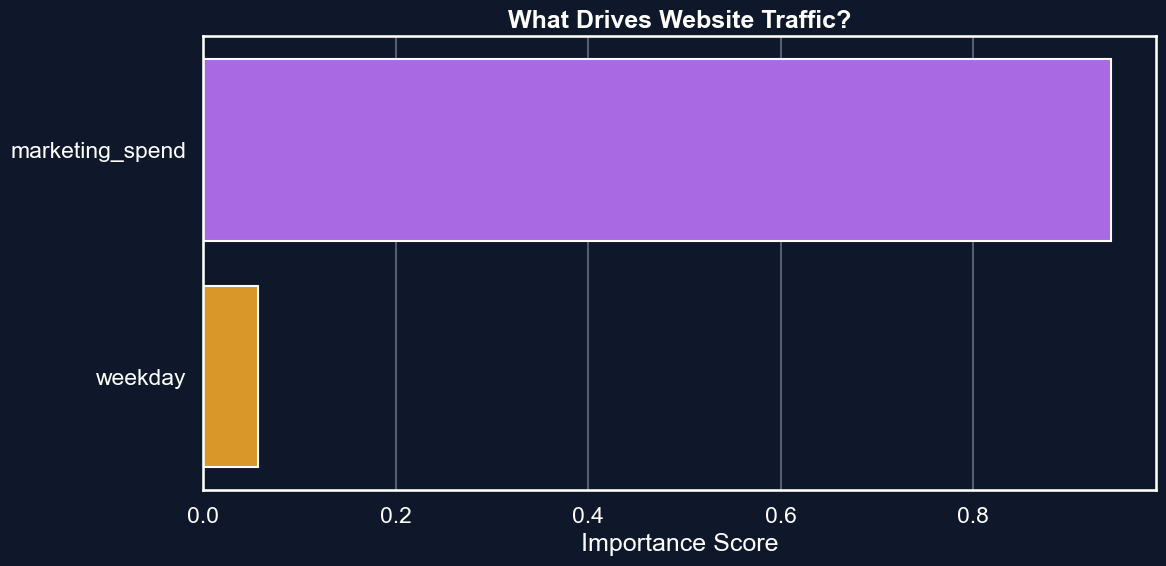

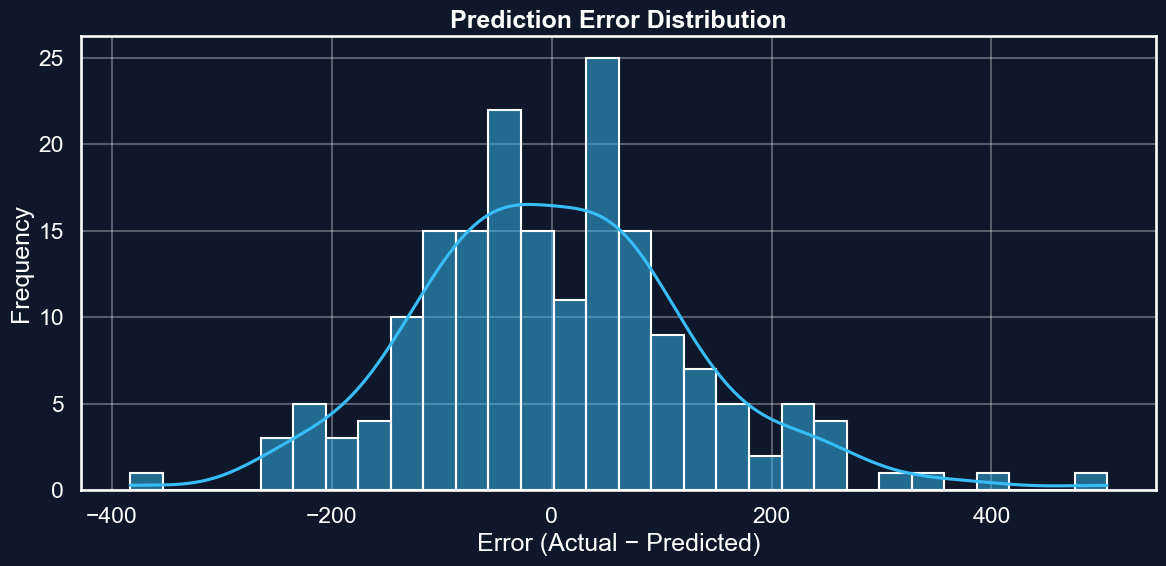

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

sns.set_theme(
    style="darkgrid",
    context="talk"
)

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.facecolor"] = "#0f172a"      
plt.rcParams["figure.facecolor"] = "#0f172a"
plt.rcParams["grid.alpha"] = 0.3
plt.rcParams["text.color"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.color"] = "white"
plt.rcParams["ytick.color"] = "white"

df=pd.read_csv("website_traffic_data.csv")
print(df.head())

x = df[["marketing_spend", "weekday"]]
y = df["website_visits"]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(x_train,y_train)
df["predicted_visits"] = model.predict(x)

df["actual_smooth"] = df["website_visits"].rolling(7).mean()
df["predicted_smooth"] = df["predicted_visits"].rolling(7).mean()

marketing_input = float(input("Enter marketing spend: "))
weekday_input = int(input("Enter weekday (0=Sun, 6=Sat): "))

prediction = model.predict([[marketing_input, weekday_input]])
print(f"Predicted Website Visits: {int(prediction[0])}")

plt.figure()
sns.lineplot(
    x=df["day"],
    y=df["actual_smooth"],
    label="Actual Traffic",
    linewidth=3,
    color="#38bdf8"     
)
sns.lineplot(
    x=df["day"],
    y=df["predicted_smooth"],
    label="Predicted Traffic",
    linewidth=3,
    color="#fb923c"     
)

plt.title("Website Traffic: Actual vs Predicted")
plt.xlabel("Day")
plt.ylabel("Website Visits")
plt.legend()
plt.tight_layout()
plt.show()


plt.figure()
sns.lineplot(
    x=df["day"],
    y=df["website_visits"],
    label="Daily Traffic",
    color="#94a3b8",
    alpha=0.35
)
sns.lineplot(
    x=df["day"],
    y=df["actual_smooth"],
    label="Smoothed Trend",
    color="#22d3ee",
    linewidth=3
)

plt.title("Website Traffic Trend (Smoothed)")
plt.xlabel("Day")
plt.ylabel("Visits")
plt.legend()
plt.tight_layout()
plt.show()


importance_df = pd.DataFrame({
    "Feature": x.columns,
    "Importance": model.feature_importances_
})

plt.figure()
sns.barplot(
    data=importance_df,
    x="Importance",
    y="Feature",
    palette=["#a855f7", "#f59e0b"]  
)

plt.title("What Drives Website Traffic?")
plt.xlabel("Importance Score")
plt.ylabel("")
plt.tight_layout()
plt.show()


errors = y - df["predicted_visits"]

plt.figure()
sns.histplot(
    errors,
    bins=30,
    kde=True,
    color="#38bdf8"
)

plt.title("Prediction Error Distribution")
plt.xlabel("Error (Actual − Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
